In [23]:
from pathlib import Path
path_folder = Path("/Users/keithlowton/Desktop/Ks/Python code/Geospatial data/London")
print(path_folder.exists())
print(path_folder)

True
/Users/keithlowton/Desktop/Ks/Python code/Geospatial data/London


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd

### Read the data in

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"

LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"


def extract_data(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)


In [7]:
df1 = extract_data(DOWNLOAD_ROOT,LONDON_SALARY)
df2 = extract_data(DOWNLOAD_ROOT,LONDON_HOUSING)
df1.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [8]:
df2.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


### Transform the data

In [13]:
data = pd.merge(df1[["median_salary", "code", "area", "date"]], df2, on=["code", "area", "date"], how="left")
data.head()

,median_salary,code,area,date,average_price,houses_sold,no_of_crimes,borough_flag
0,33020.0,E09000001,city of london,1999-12-01,169309.0,97.0,NaN,1.0
1,21480.0,E09000002,barking and dagenham,1999-12-01,68812.0,267.0,NaN,1.0
2,19568.0,E09000003,barnet,1999-12-01,149510.0,619.0,NaN,1.0
3,18621.0,E09000004,bexley,1999-12-01,93905.0,460.0,NaN,1.0
4,18532.0,E09000005,brent,1999-12-01,123398.0,395.0,NaN,1.0


In [14]:
data.describe(include="all")

,median_salary,code,area,date,average_price,houses_sold,no_of_crimes,borough_flag
count,1049.000000,1071,1071,1071,9.030000e+02,860.000000,617.000000,903.000000
unique,NaN,51,51,21,NaN,NaN,NaN,NaN
top,NaN,E09000001,city of london,1999-12-01,NaN,NaN,NaN,NaN
freq,NaN,21,21,51,NaN,NaN,NaN,NaN
mean,27977.792183,NaN,NaN,NaN,3.099169e+05,3853.289535,2038.090762,0.767442
std,6412.807487,NaN,NaN,NaN,1.875274e+05,12917.661579,879.517578,0.422697
min,15684.000000,NaN,NaN,NaN,4.829800e+04,6.000000,0.000000,0.000000
25%,23857.000000,NaN,NaN,NaN,1.892870e+05,246.000000,1542.000000,1.000000
50%,27441.000000,NaN,NaN,NaN,2.608930e+05,351.000000,2008.000000,1.000000
75%,30932.000000,NaN,NaN,NaN,3.875970e+05,626.000000,2402.000000,1.000000


In [15]:
data = data.dropna(subset = ["median_salary"])
data = data.reset_index(drop=True)
data.head()

,median_salary,code,area,date,average_price,houses_sold,no_of_crimes,borough_flag
0,33020.0,E09000001,city of london,1999-12-01,169309.0,97.0,NaN,1.0
1,21480.0,E09000002,barking and dagenham,1999-12-01,68812.0,267.0,NaN,1.0
2,19568.0,E09000003,barnet,1999-12-01,149510.0,619.0,NaN,1.0
3,18621.0,E09000004,bexley,1999-12-01,93905.0,460.0,NaN,1.0
4,18532.0,E09000005,brent,1999-12-01,123398.0,395.0,NaN,1.0


In [16]:
data["salary_cat"] = pd.cut(data["median_salary"], bins=[10000, 20000, 30000, 40000, np.inf], labels=[1, 2, 3, 4])


### London map

In [27]:
londres_map = gpd.read_file(os.path.join(path_folder, "London_Borough_Excluding_MHW.shp"))
londres_map.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<Axes: >

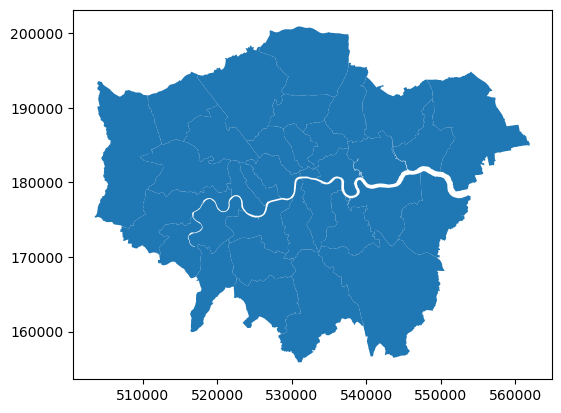

In [26]:
londres_map.plot()

In [28]:
londres_map.columns = londres_map.columns.str.lower()
londres_map = londres_map.rename({"name": "area", "gss_code": "code"}, axis=1)

londres_map["area"] = londres_map["area"].str.lower()
londres_map = londres_map.filter(items=["area", "code", "hectares", "geometry"])


In [29]:
df_m = data.groupby("area").agg({"average_price": ["mean"], "houses_sold": "sum", "median_salary": ["mean"]})
df_m.columns = ["average_price", "houses_sold", "median_salary"]
df_m.reset_index(inplace=True)
df_m.head()


,area,average_price,houses_sold,median_salary
0,barking and dagenham,185033.857143,4354.0,28218.190476
1,barnet,353509.000000,8217.0,27788.100000
2,bexley,204821.789474,6070.0,25633.000000
3,brent,310442.952381,5206.0,26254.666667
4,bromley,284840.250000,10188.0,24868.900000


In [31]:
londres_map = pd.merge(londres_map, df_m, on="area", how="inner")
londres_map.head()

,area,code,hectares,geometry,average_price,houses_sold,median_salary
0,kingston upon thames,E09000021,3726.117,"POLYGON ((516401.600 160201.800, 516407.300 16...",315774.900000,4663.0,26653.550000
1,croydon,E09000008,8649.441,"POLYGON ((535009.200 159504.700, 535005.500 15...",239932.333333,9592.0,27425.571429
2,bromley,E09000006,15013.487,"POLYGON ((540373.600 157530.400, 540361.200 15...",284840.250000,10188.0,24868.900000
3,hounslow,E09000018,5658.541,"POLYGON ((521975.800 178100.000, 521967.700 17...",269743.761905,5613.0,29801.666667
4,ealing,E09000009,5554.428,"POLYGON ((510253.500 182881.600, 510249.900 18...",314953.142857,7060.0,27498.333333


### Visualisations

(500648.735, 564876.965, 153596.645, 203188.055)

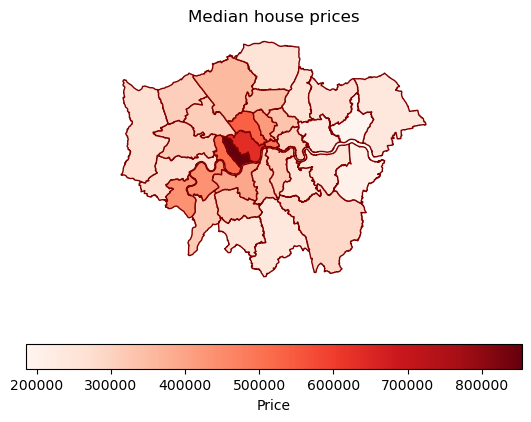

In [34]:
plt = londres_map.plot(
    column="average_price",
    cmap="Reds",
    edgecolor="maroon",
    legend=True,
    legend_kwds={"label": "Price", "orientation": "horizontal"},
)

plt.set_title("Median house prices")
plt.axis("off")


(500648.735, 564876.965, 153596.645, 203188.055)

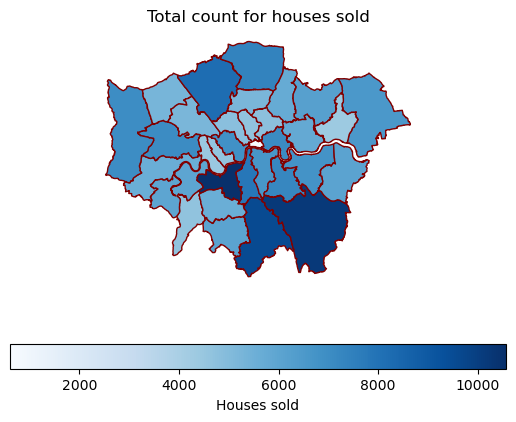

In [35]:
plt = londres_map.plot(
    column="houses_sold",
    cmap="Blues",
    edgecolor="maroon",
    legend=True,
    legend_kwds={"label": "Houses sold", "orientation": "horizontal"},
)

plt.set_title("Total count for houses sold")
plt.axis("off")


(500648.735, 564876.965, 153596.645, 203188.055)

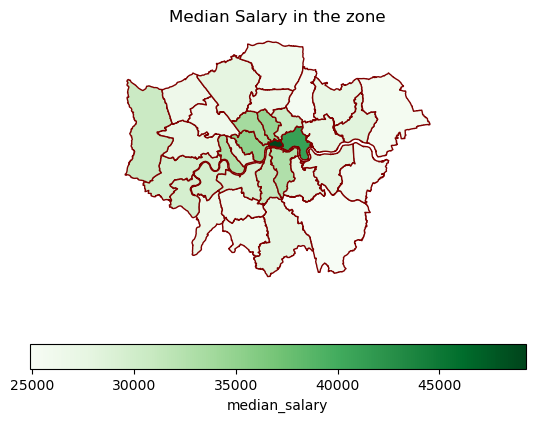

In [36]:
plt = londres_map.plot(
    column="median_salary",
    cmap="Greens",
    edgecolor="maroon",
    legend=True,
    legend_kwds={"label": "median_salary", "orientation": "horizontal"},
)

plt.set_title("Median Salary in the zone")
plt.axis("off")


### Contextily

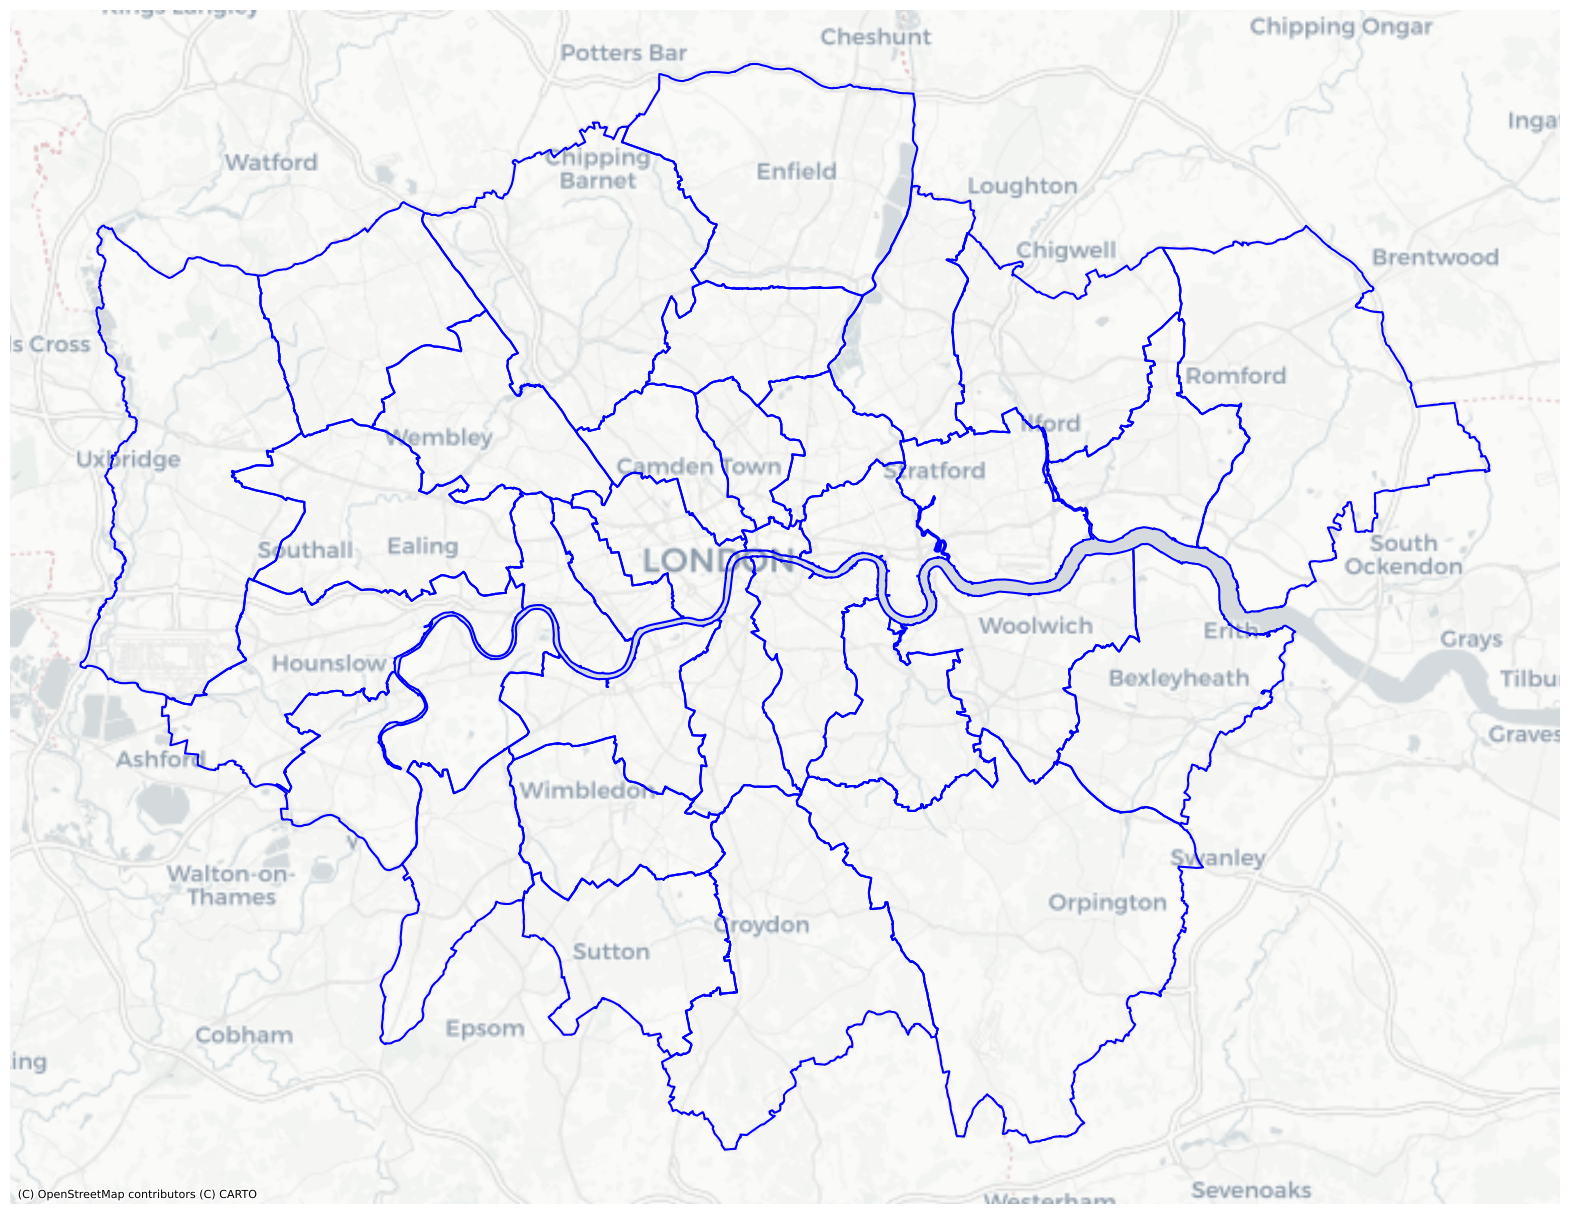

In [38]:
import contextily as ctx

gdf = londres_map.to_crs(epsg=3857)

ax = gdf.boundary.plot(figsize=(20, 20), alpha=1.0, edgecolor='blue')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()